**Random Forest Project**

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

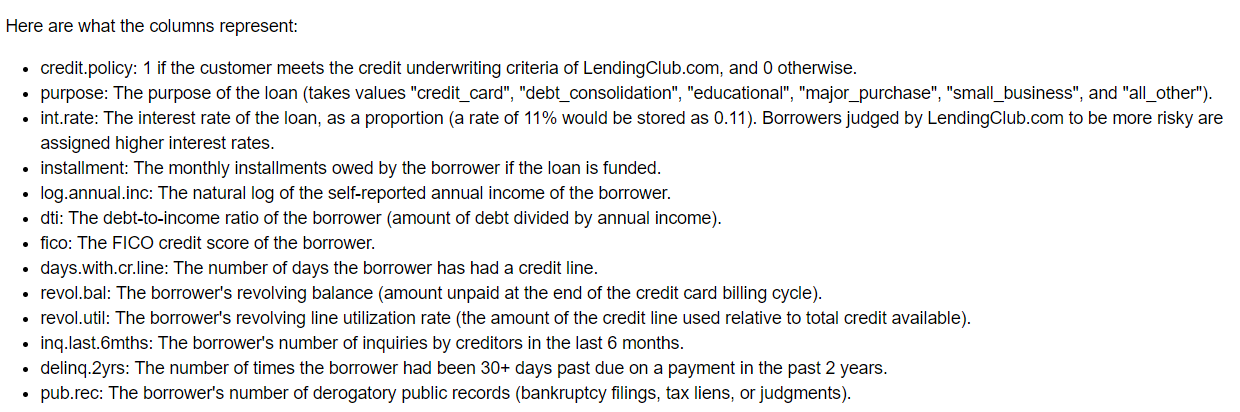

In [160]:
loans = pd.read_csv('/kaggle/input/loan-data/loan_data.csv')

In [161]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [162]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [163]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

**Let's review some of the data to better understand the overall information.**

Text(0.5, 0, 'FICO')

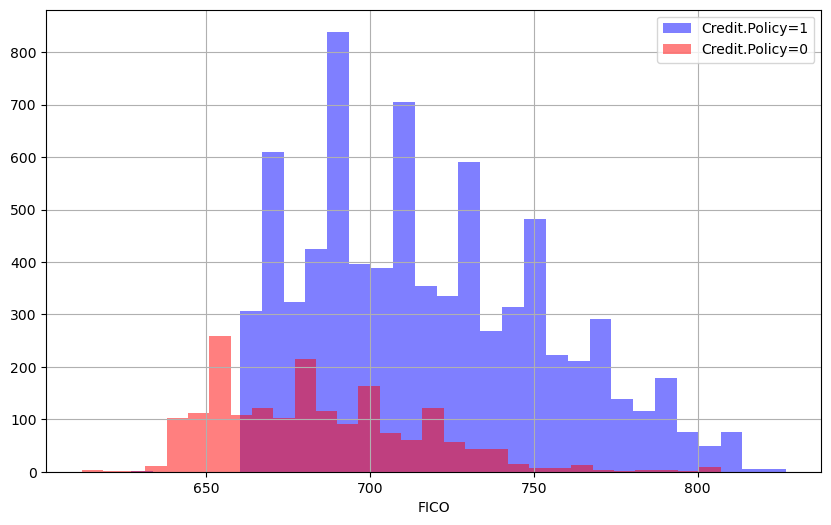

In [164]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

There are more people with the credit policy equals to 1.

Based on th FICO score the people with lower score tend to have the credit policy equals to 0 and there is a cut off point at FICO score around 660-670 which means people who have the FICO score below this point are getting the credit policy 0.

Text(0.5, 0, 'FICO')

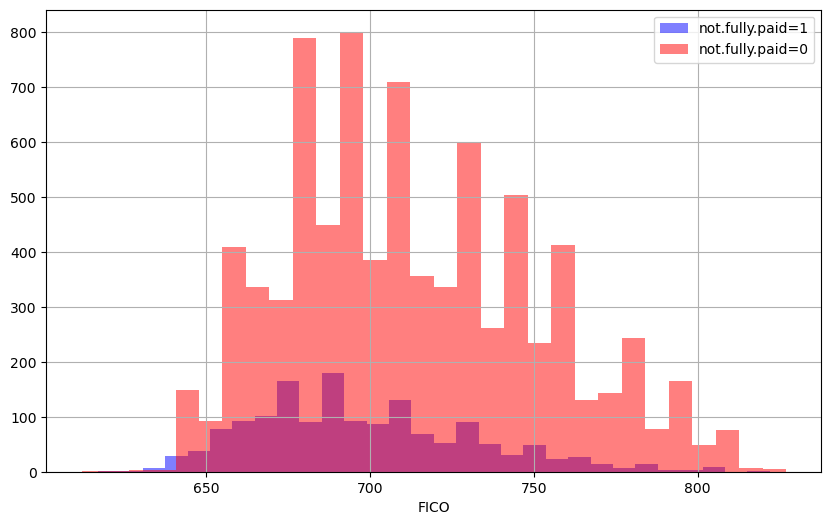

In [165]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

The majority of people are fully paid their loan.

The distribution of not-fully paid and FICO score are in the same manner.

<AxesSubplot:xlabel='purpose', ylabel='count'>

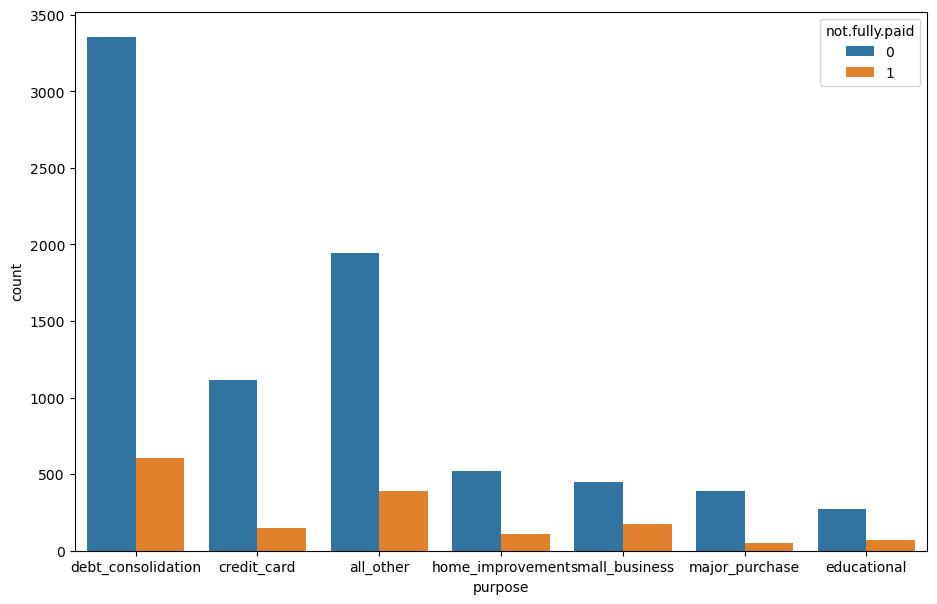

In [166]:
plt.figure(figsize=(11,7))
sns.countplot(x= loans['purpose'],data = loans, hue = 'not.fully.paid')

The above data shows that the debt consolidation is the most popular reason for wanting a loan. 

I noticed some interesting pattern here, the proportion between fully paid and not-fully paid are quite similar for every reason.

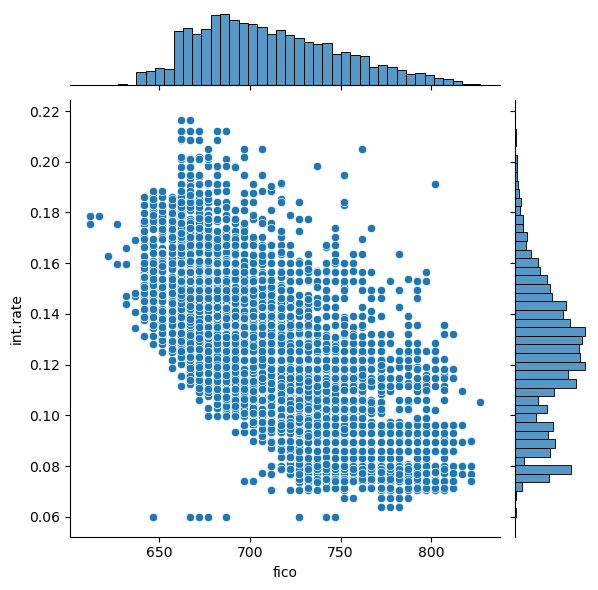

In [167]:
sns.jointplot(x=loans['fico'], y=loans['int.rate'], data=loans)

It makes sense that the people with higher FICO score pay less interest.

<Figure size 1100x700 with 0 Axes>

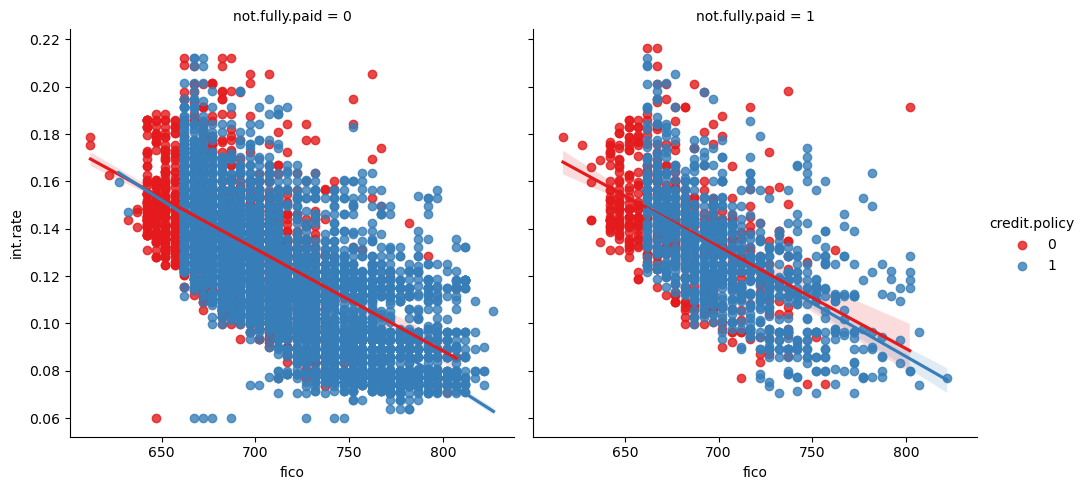

In [168]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

The trends among the not-fully paid and fully paid are the same.

We need to tranforms the purpose column into the dummy variable so that the training model can understand

In [169]:
cat_feats = ['purpose']

In [170]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [171]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


**Let's train our data**

We are going to predict whether or not the borrower paid the full loan.

In [172]:
from sklearn.model_selection import train_test_split
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [173]:
X = final_data.drop('not.fully.paid',axis = 1)
y = final_data['not.fully.paid']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Split the data into train and test sets. I am using the 0.30 ratio which is quite common. the random state can normally be anything, it is a random generator.

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dtree = DecisionTreeClassifier()

In [177]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Fit the decision tree model with te train data.

In [178]:
predictions = dtree.predict(X_test)

In [179]:
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



By comparing the test set with the predicitons the result is not very well, the average of indications is only around 0.74.

In [181]:
print(confusion_matrix(y_test,predictions))

[[1980  451]
 [ 342  101]]


**Let's try using Random Forest**

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rfc = RandomForestClassifier(n_estimators=300)

In [184]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [185]:
pred_i = rfc.predict(X_test)

In [186]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



We've got a slightly better results with Random Forest.

In [187]:
print(confusion_matrix(y_test,pred_i))

[[2423    8]
 [ 433   10]]


Eventhough the Random Forest has a better overall performance, the recall and f1-score equals to 1 perform worse, individually.

It really depends on the context to decide whether this model is good enough

**Let's predict some made-up data.**

In [188]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2874 entries, 5244 to 6599
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2874 non-null   int64  
 1   int.rate                    2874 non-null   float64
 2   installment                 2874 non-null   float64
 3   log.annual.inc              2874 non-null   float64
 4   dti                         2874 non-null   float64
 5   fico                        2874 non-null   int64  
 6   days.with.cr.line           2874 non-null   float64
 7   revol.bal                   2874 non-null   int64  
 8   revol.util                  2874 non-null   float64
 9   inq.last.6mths              2874 non-null   int64  
 10  delinq.2yrs                 2874 non-null   int64  
 11  pub.rec                     2874 non-null   int64  
 12  purpose_credit_card         2874 non-null   uint8  
 13  purpose_debt_consolidation  28

In [189]:
X_test.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [215]:
import random


my_data = pd.DataFrame(columns=X_test.columns)


for col in X_test.columns:
    min_value = min(X_test[col])
    max_value = max(X_test[col])

    if col in ['int.rate', 'installment', 'log.annual.inc', 'dti',
               'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
               'inq.last.6mths', 'delinq.2yrs', 'pub.rec']:
        my_data[col] = np.random.uniform(low=min_value, high=max_value, size=1)
    elif col in ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']:
        my_data[col] = round(np.random.randint(low=min_value, high=max_value, size=1))
    else:
        my_data[col] = 0

my_data.loc[0, ['purpose_credit_card','credit.policy']] = 1
my_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.078222,734.203399,10.377233,7.367434,726.583363,2409.108746,589193.285927,15.766565,1.576694,3.968768,1.432789,1,0,0,0,0,0


Create a one row dataframe with a random data.

In [213]:
X_test.describe().loc[['min','max']]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
min,0.0,0.0600,15.91,7.600902,0.00,627.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,0.2086,926.83,14.528354,29.95,827.0,15692.0,952013.0,108.8,31.0,7.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0


In [216]:
my_pred = rfc.predict(my_data)
list(my_pred)

[0]

If a random person with the profile indicated in my_data dataframe walks in, based on the model, that person is not going to be able to fully pay his/her loan.